# **Imports**

Below are all the imports used in this **notebook**.

In [224]:
# Common
import numpy as np
import pandas as pd

# Data 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

# **Data Loading**

In order to do anything, we first need the data.

In [225]:
# Specify the File Path
file_path = 'Pumpkin_Seeds_Dataset.xlsx'

# Load File 
df = pd.read_excel(file_path)

# A quick view
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


# **Data Info**

Let's note some basic but important information about the data.

In [226]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


It is important to have a look at the **Class Distribution**.

In [227]:
# Calculate Values
names = df['Class'].value_counts().index
values = df['Class'].value_counts()

# Plotting
fig = px.pie(names=names, values=values, title="Class Distribution", width=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Greet!!**, the **classes** are **almost equally distributed**. This ensures that are **model cannot be biased towards any class**.

# **Data Visulaization**

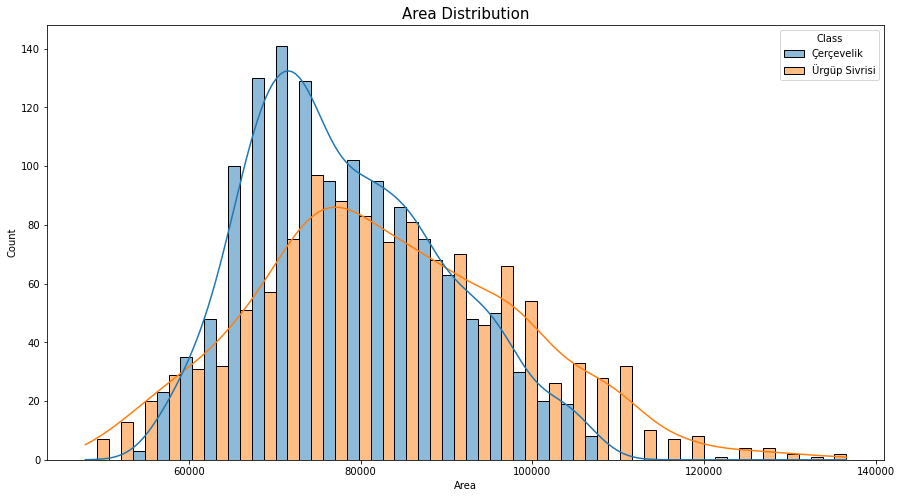

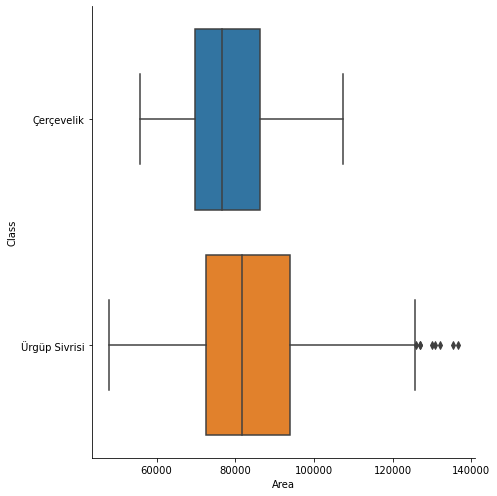

In [228]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Area', kde=True, hue='Class', multiple='dodge')
plt.title("Area Distribution", fontsize=15)

# Box plot
sns.catplot(data=df, y='Class', x='Area', kind='box', aspect=1, height=7)

plt.show()

$Observations :$
* If you notice carefully then the **KDE** shows us that the **peak of both distributions is not at the same point**. This shows are **separation** between both **classes** in terms of **Area**. In general we can say that : 

 * **Higher values** of area belongs to the class **Ürgüp Sivrisi**
 * **Lower values** of area belongs to the class **Çerçevelik**

* The **Box plot** confirms that there is a **minor separation between both classes**. And the **Çerçevelik** class is **concentrated** towards the **lower values** of **Area** whereas **Ürgüp Sivrisi** class is **concentrated** towards the **higher values** of **Area**.


---

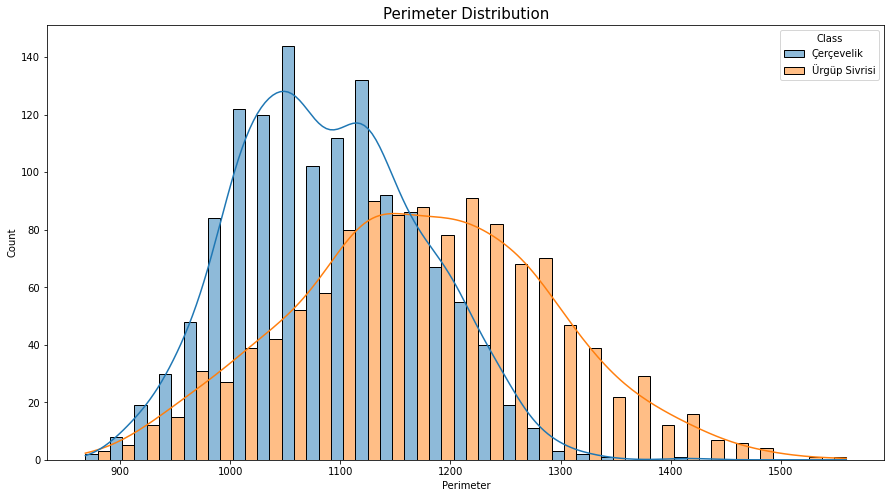

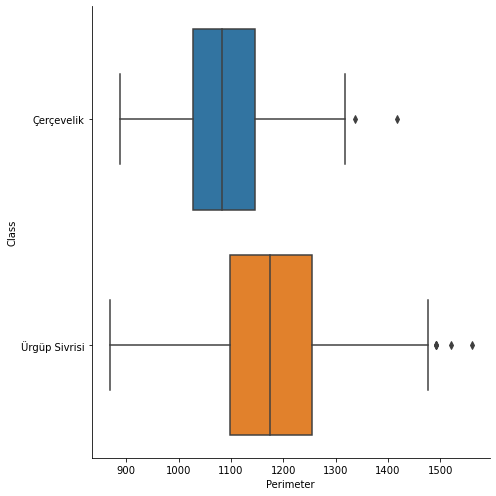

In [229]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Perimeter', kde=True, hue='Class', multiple='dodge')
plt.title("Perimeter Distribution", fontsize=15)

# Boxplot
sns.catplot(data=df, y='Class', x='Perimeter', kind='box', aspect=1, height=7)

plt.show()

$ Observations :$
* Similar to the **area distribution**. Here, we can find a **clear difference** between both **class distributions** in terms of **Perimeter**. One more thing to notice is that **Çerçevelik** has **two peaks**, whereas **Ürgüp Sivrisi** has a **flat peak**.

* The **Box plot** shows that this time the **separation** is **much clear**.


---

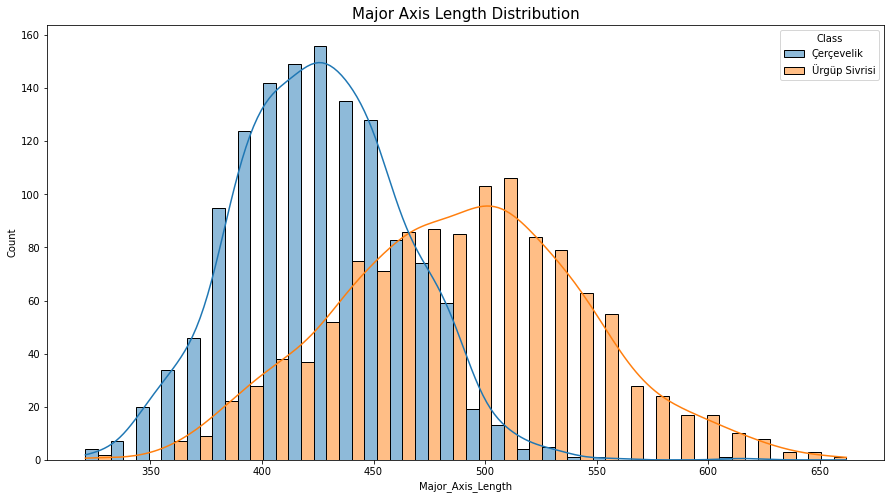

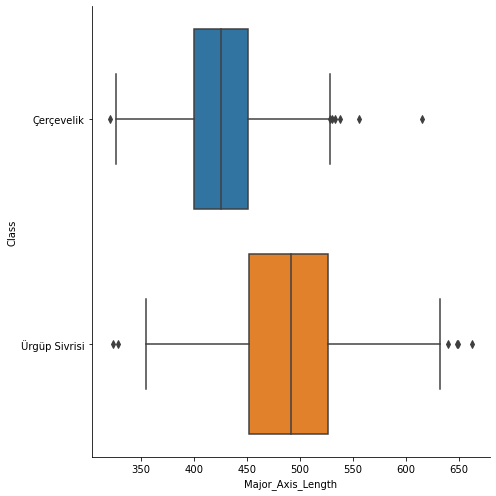

In [230]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Major_Axis_Length', kde=True, hue='Class', multiple='dodge')
plt.title("Major Axis Length Distribution", fontsize=15)

sns.catplot(data=df, y='Class', x='Major_Axis_Length', kind='box', aspect=1, height=7)

plt.show()

The results are still the same but the classes are getting **clearly seperated**.

---

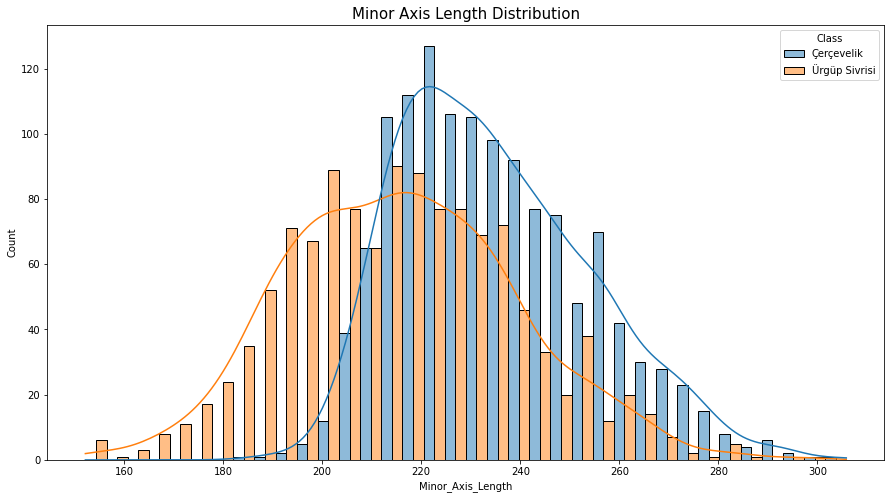

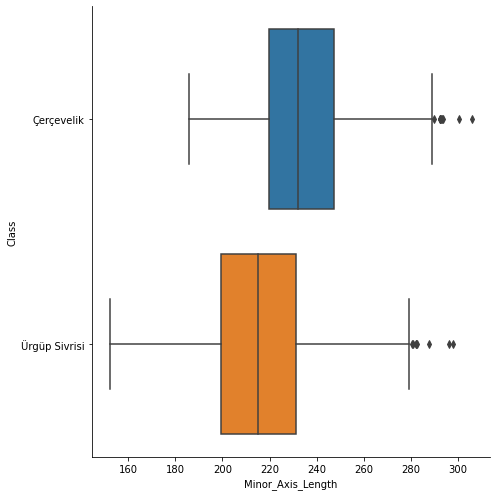

In [231]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Minor_Axis_Length', kde=True, hue='Class', multiple='dodge')
plt.title("Minor Axis Length Distribution", fontsize=15)

# Boxplot
sns.catplot(data=df, y='Class', x='Minor_Axis_Length', kind='box', aspect=1, height=7)

plt.show()

This time the story is flipped.

**Higher values** of **minor axis length** tends towards **Çerçevelik** class, whereas **lower values** tends towards **Ürgüp Sivrisi** class.

---

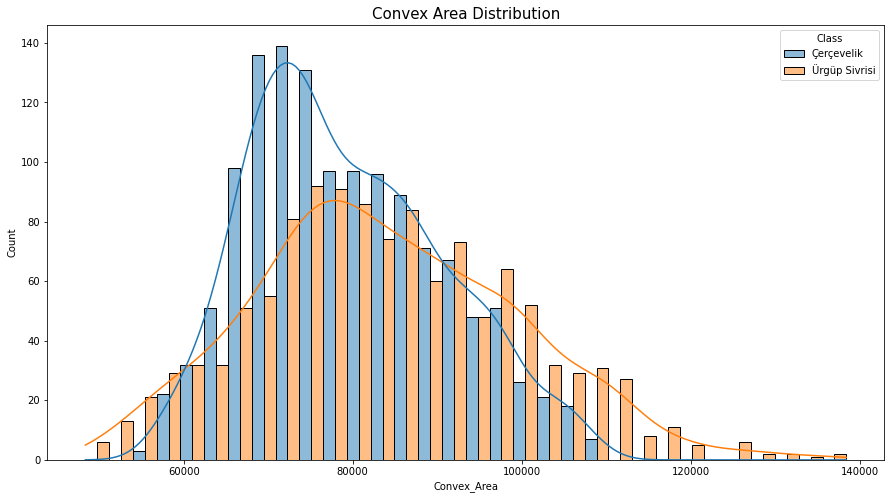

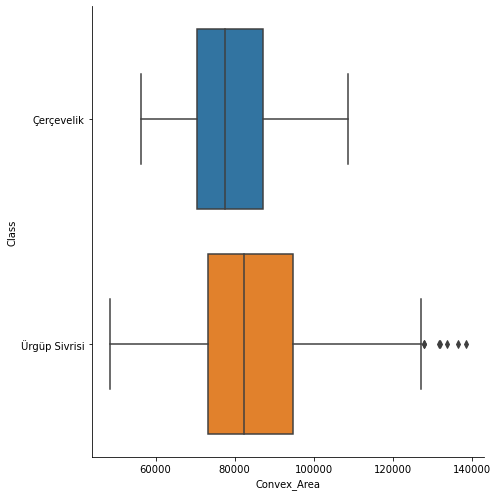

In [232]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Convex_Area', kde=True, hue='Class', multiple='dodge')
plt.title("Convex Area Distribution", fontsize=15)

# Boxplot
sns.catplot(data=df, y='Class', x='Convex_Area', kind='box', aspect=1, height=7)

plt.show()

This distribution looks **exactly the same** as the **Area distribution**.

This time the **distributions** are **not well separated** because both **peaks** lies **close to each other**.

---

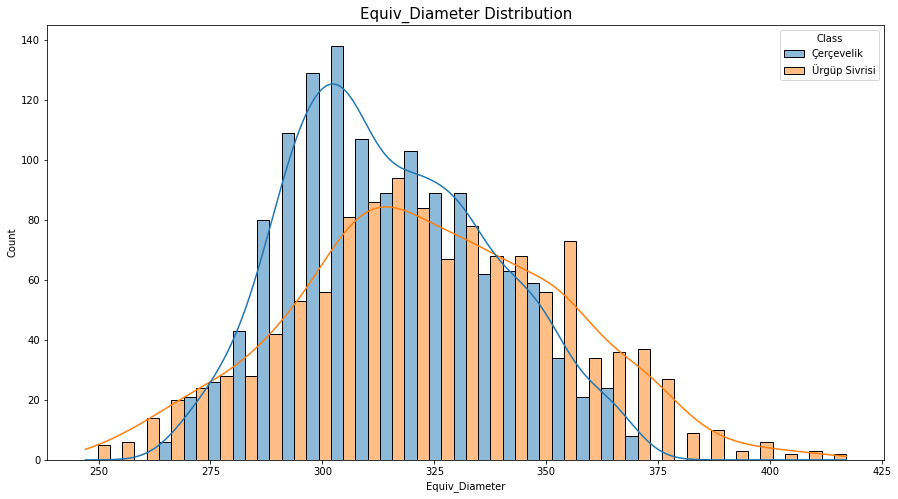

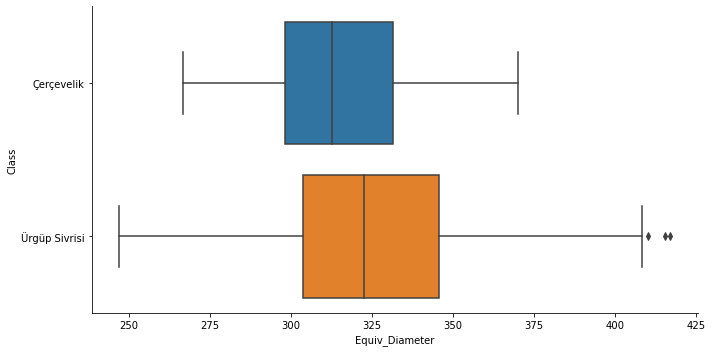

In [233]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Equiv_Diameter', kde=True, hue='Class', multiple='dodge')
plt.title("Equiv_Diameter Distribution", fontsize=15)

# Box Plot
sns.catplot(data=df, x='Equiv_Diameter', y='Class', kind='box', aspect=2, height=5)

plt.show()

Both **distributions** have **two smaller peaks**, the **second peak** is much **lower** than the **previous peak**. The peaks are **not well separated**.

---

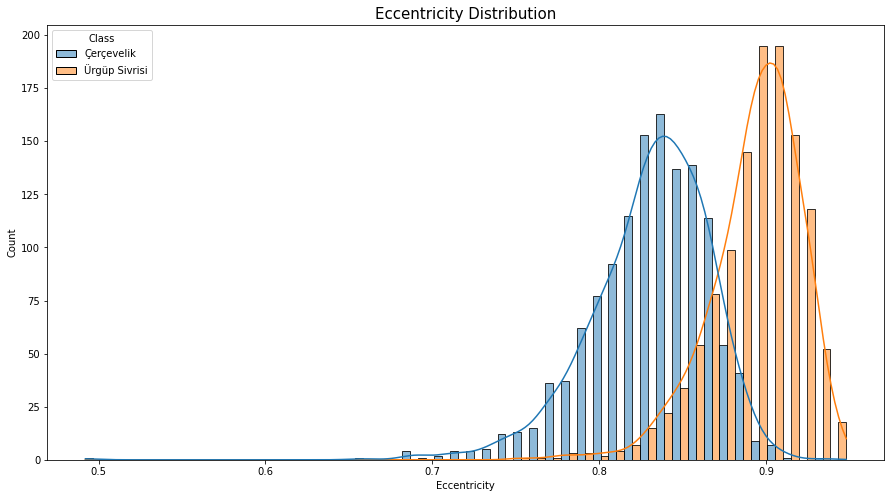

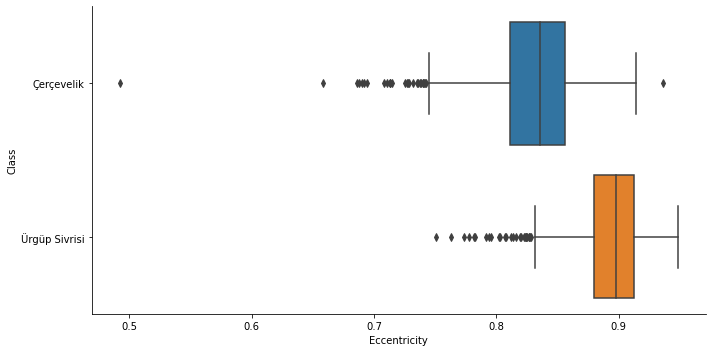

In [234]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Eccentricity', kde=True, hue='Class', multiple='dodge')
plt.title("Eccentricity Distribution", fontsize=15)

# Box Plot
sns.catplot(data=df, x='Eccentricity', y='Class', kind='box', aspect=2, height=5)

plt.show()

Both the **distributions** are **well separated** and in general, when **one distribution ends the other starts(in terms of peaks)**. 

---

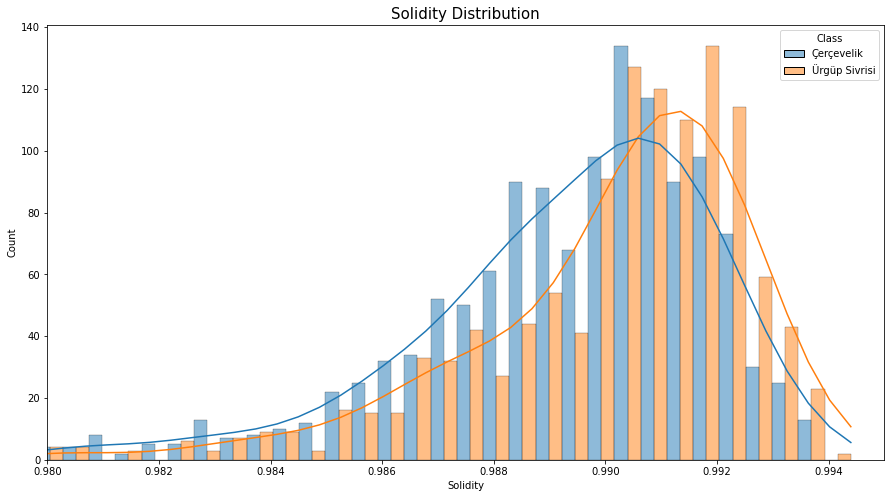

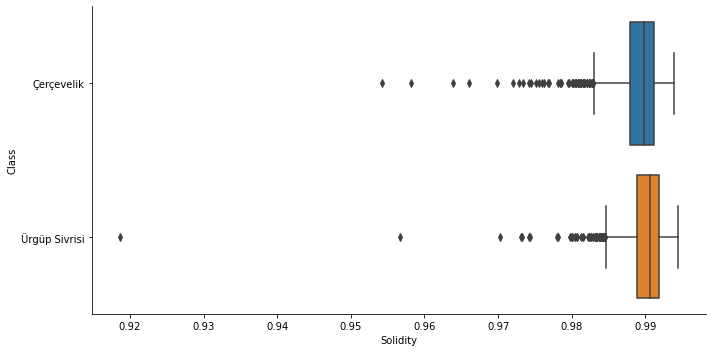

In [235]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Solidity', kde=True, hue='Class', multiple='dodge')
plt.title("Solidity Distribution", fontsize=15)
plt.xlim([0.98,0.995])

# Box Plot
sns.catplot(data=df, x='Solidity', y='Class', kind='box', aspect=2, height=5)

plt.show()

Both distributions have **peak at the same location they are not well separated.** This means the **solidity** of both class is **roughly the same**.

---

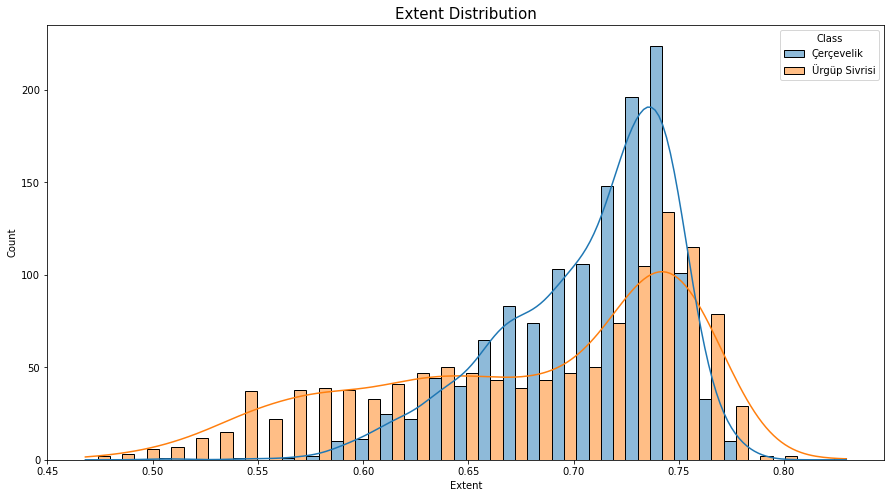

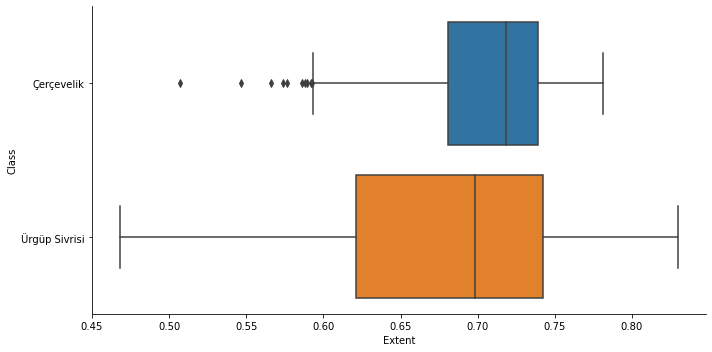

In [236]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Extent', kde=True, hue='Class', multiple='dodge')
plt.title("Extent Distribution", fontsize=15)

# Box Plot
sns.catplot(data=df, x='Extent', y='Class', kind='box', aspect=2, height=5)

plt.show()

The distribution is **quite interesting** because it first goes through a **flat plateau** for **Ürgüp Sivrisi** class, whereas shows a **straight increase** for **Çerçevelik** class but both **forms speak at roughly the same location**.

---

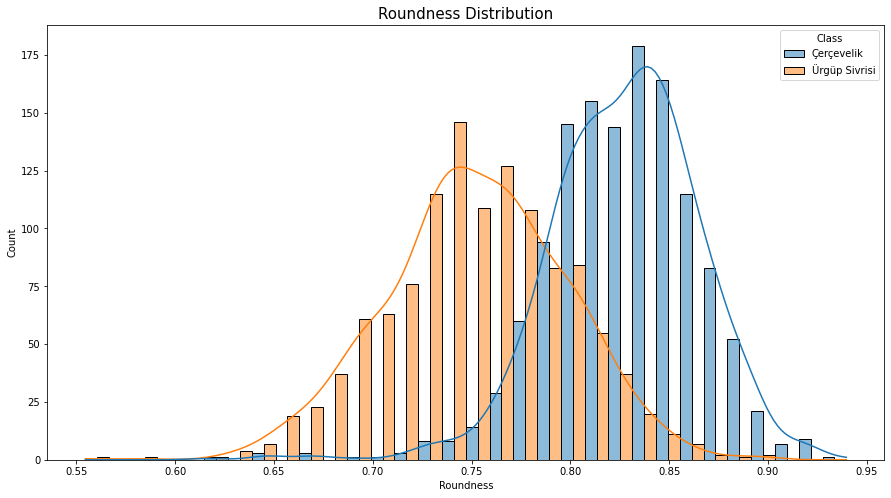

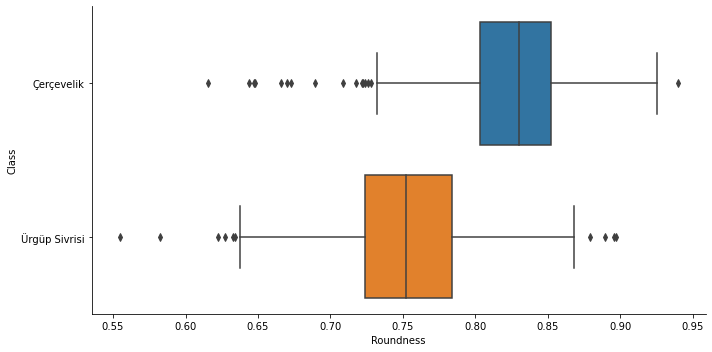

In [237]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Roundness', kde=True, hue='Class', multiple='dodge')
plt.title("Roundness Distribution", fontsize=15)

# Box Plot
sns.catplot(data=df, x='Roundness', y='Class', kind='box', aspect=2, height=5)

plt.show()

In terms of **roundness when the classes are well seperated**.


---

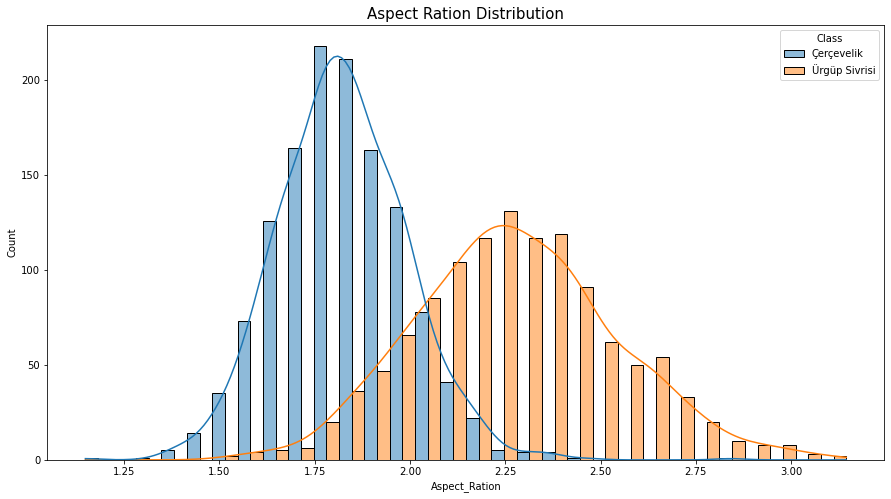

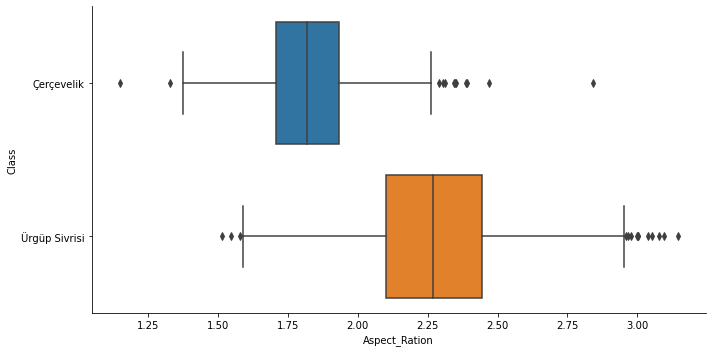

In [238]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Aspect_Ration', kde=True, hue='Class', multiple='dodge')
plt.title("Aspect Ration Distribution", fontsize=15)

# Box Plot
sns.catplot(data=df, x='Aspect_Ration', y='Class', kind='box', aspect=2, height=5)

plt.show()

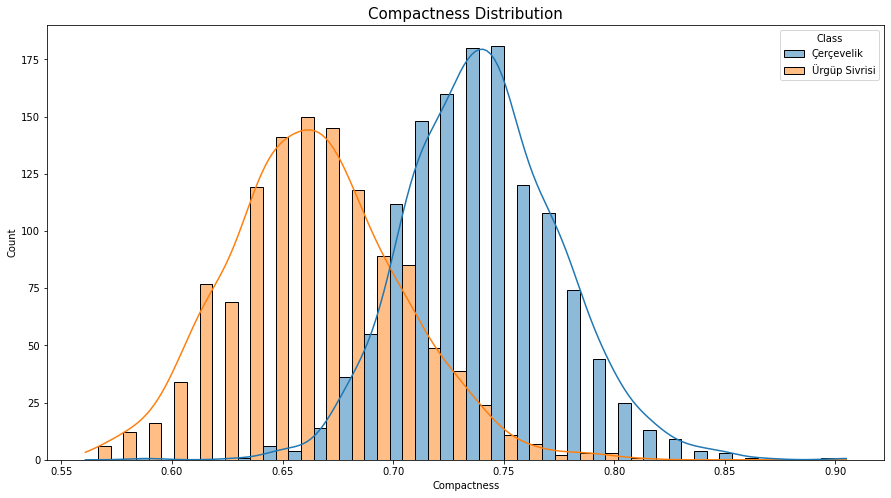

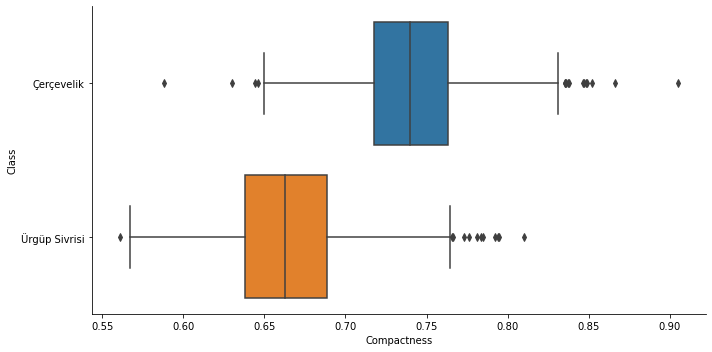

In [239]:
plt.figure(figsize=(15,8))

# Histogram
sns.histplot(data=df, x='Compactness', kde=True, hue='Class', multiple='dodge')
plt.title("Compactness Distribution", fontsize=15)

# Box Plot
sns.catplot(data=df, x='Compactness', y='Class', kind='box', aspect=2, height=5)

plt.show()

Both distributions have a well separated class distribution.


---

let's have a look at the **correlation** among the **Features**

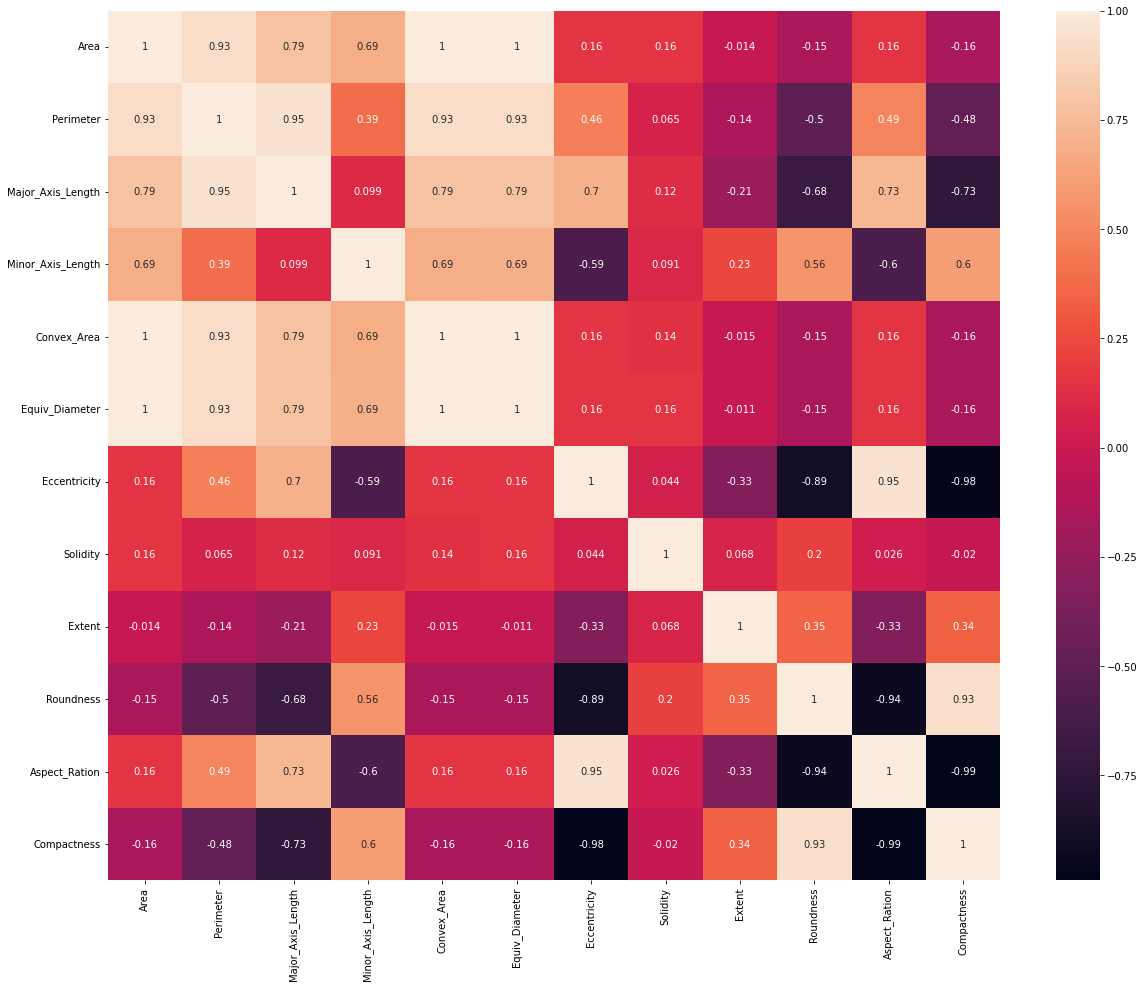

In [240]:
# Correlation
corr = df.corr()

# Figure
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True)
plt.show()

Let's have a look at some of the **most strongest correlations**. many relations are **highly positive** like above **90**, so we will focus on them.

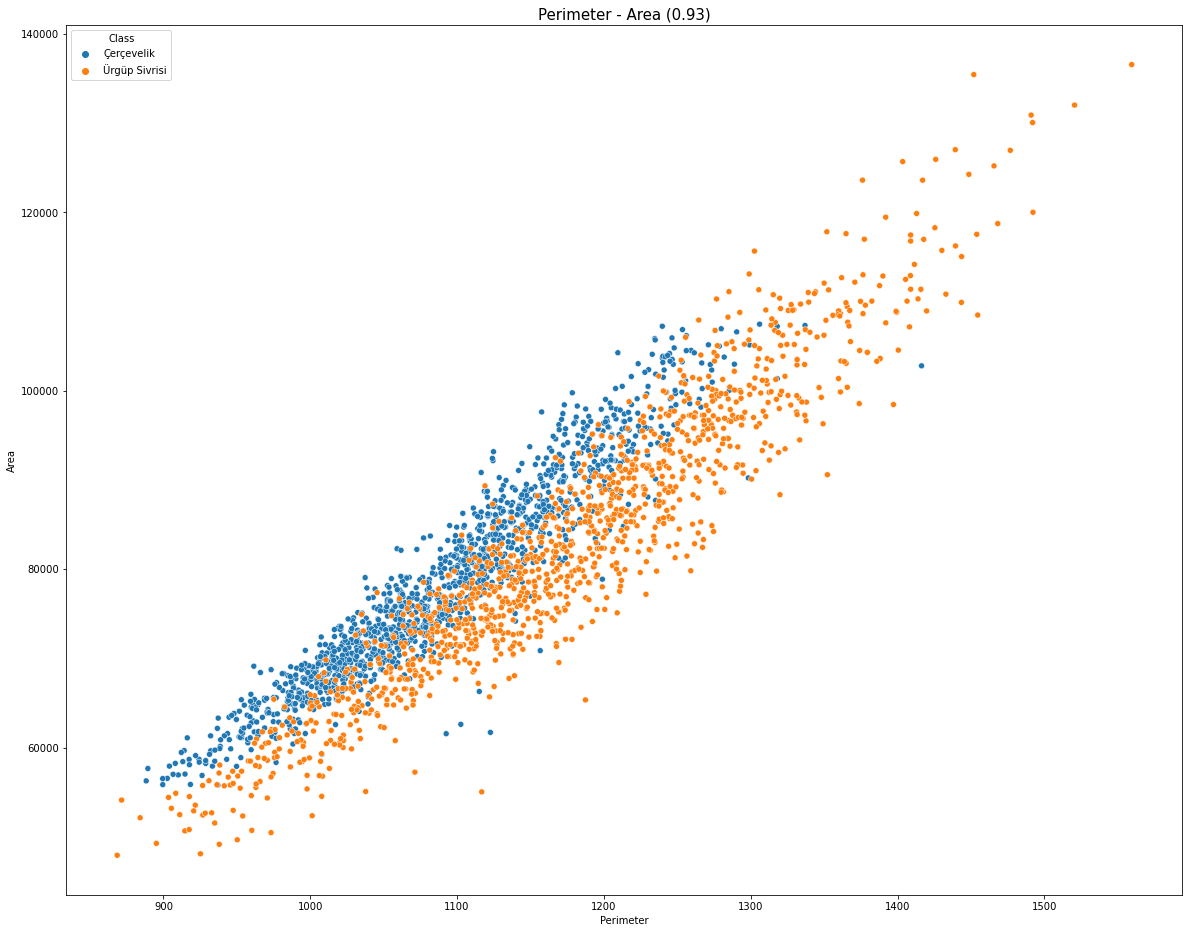

In [241]:
plt.figure(figsize=(20,16))
sns.scatterplot(data=df, x='Perimeter', y='Area', hue='Class')
plt.title("Perimeter - Area (0.93)", fontsize=15)
plt.show()

The **linear relationship** can easily be spotted but the classes are **not well separated**.

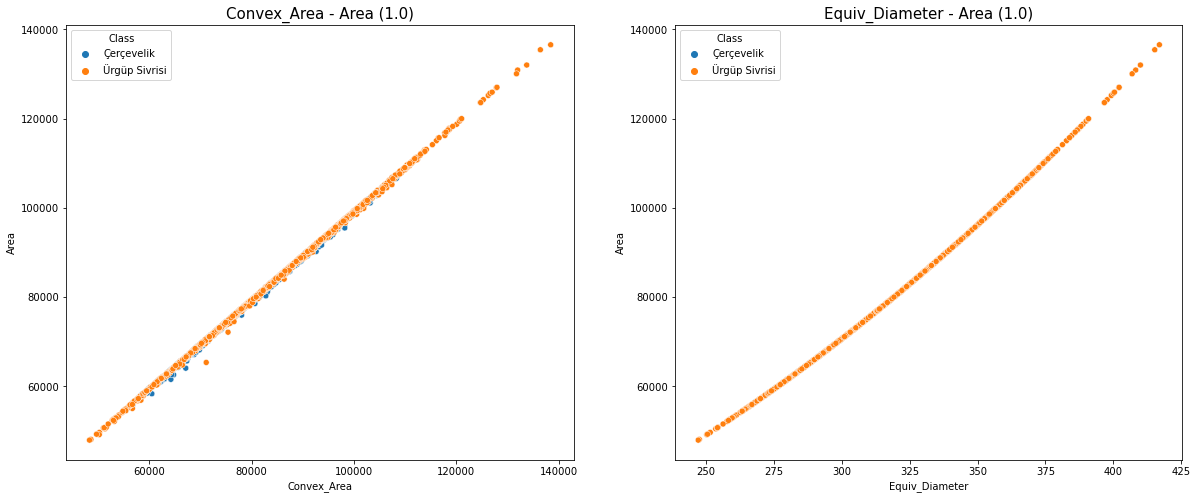

In [242]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Convex_Area', y='Area', hue='Class')
plt.title("Convex_Area - Area (1.0)", fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Equiv_Diameter', y='Area', hue='Class')
plt.title("Equiv_Diameter - Area (1.0)", fontsize=15)

plt.show()

Would the relations are **extremely linear**, but their is **no seperation for classes**.

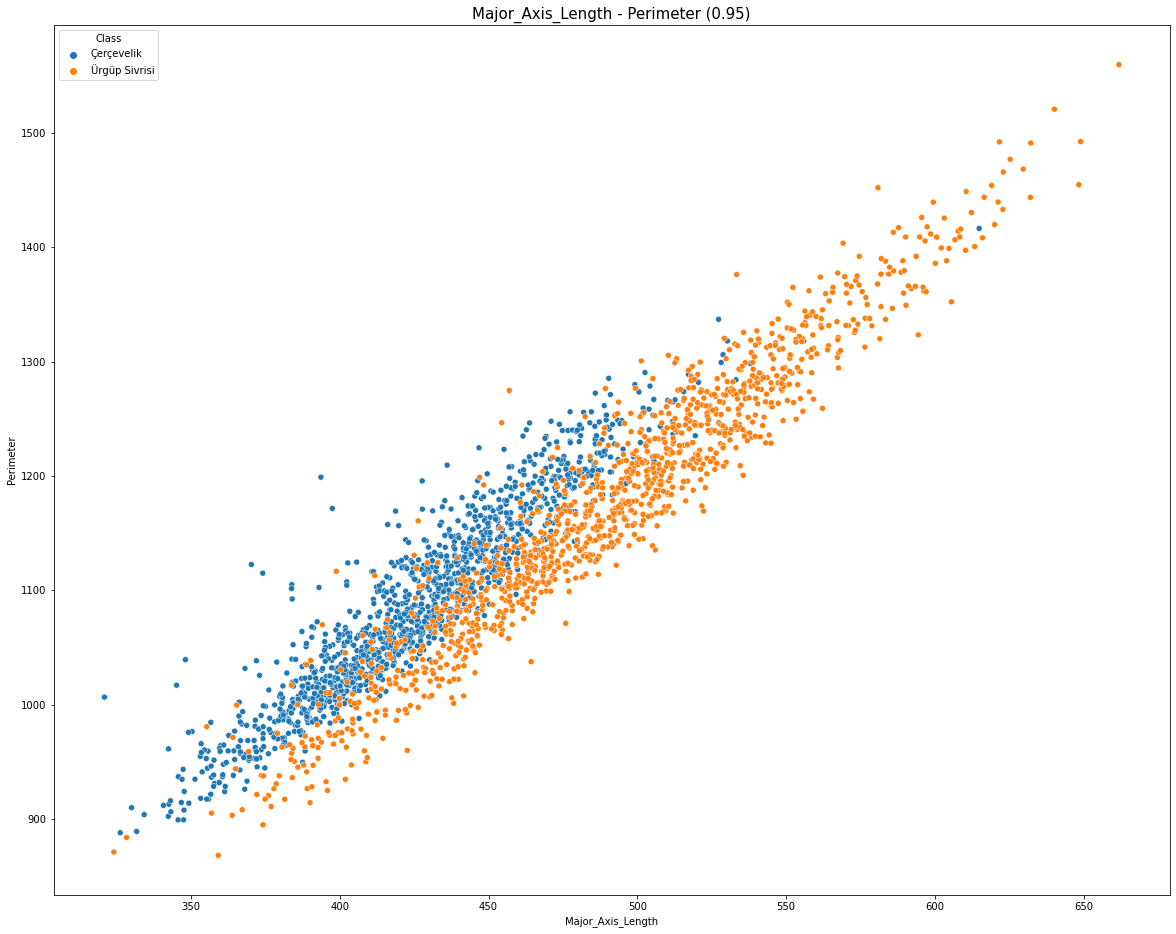

In [243]:
plt.figure(figsize=(20,16))
sns.scatterplot(data=df, x='Major_Axis_Length', y='Perimeter', hue='Class')
plt.title("Major_Axis_Length - Perimeter (0.95)", fontsize=15)
plt.show()

The **linear relationship** is **clear** and the classes are also **well distributed**.

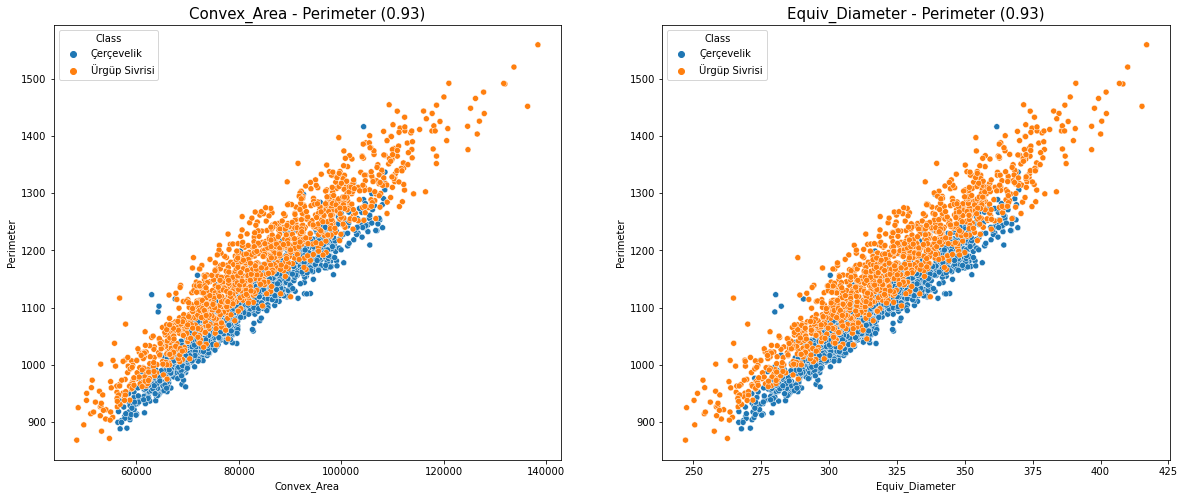

In [244]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Convex_Area', y='Perimeter', hue='Class')
plt.title("Convex_Area - Perimeter (0.93)", fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Equiv_Diameter', y='Perimeter', hue='Class')
plt.title("Equiv_Diameter - Perimeter (0.93)", fontsize=15)

plt.show()

Both the **plots looks exactly the same**.

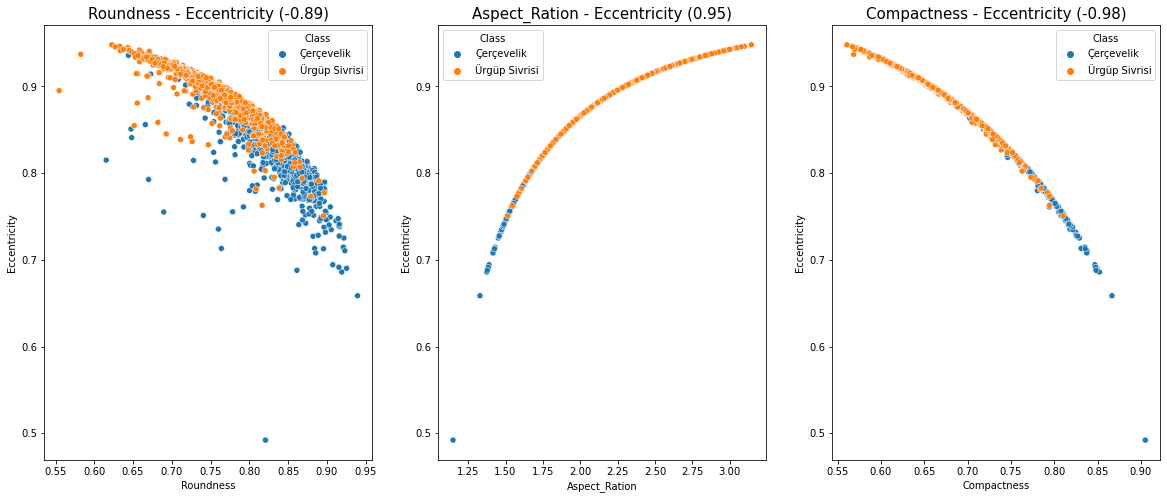

In [245]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='Roundness', y='Eccentricity', hue='Class')
plt.title("Roundness - Eccentricity (-0.89)", fontsize=15)

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='Aspect_Ration', y='Eccentricity', hue='Class')
plt.title("Aspect_Ration - Eccentricity (0.95)", fontsize=15)

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='Compactness', y='Eccentricity', hue='Class')
plt.title("Compactness - Eccentricity (-0.98)", fontsize=15)

plt.show()

All these relations are **linear** but they are **more shifted toward quadratic relations**.

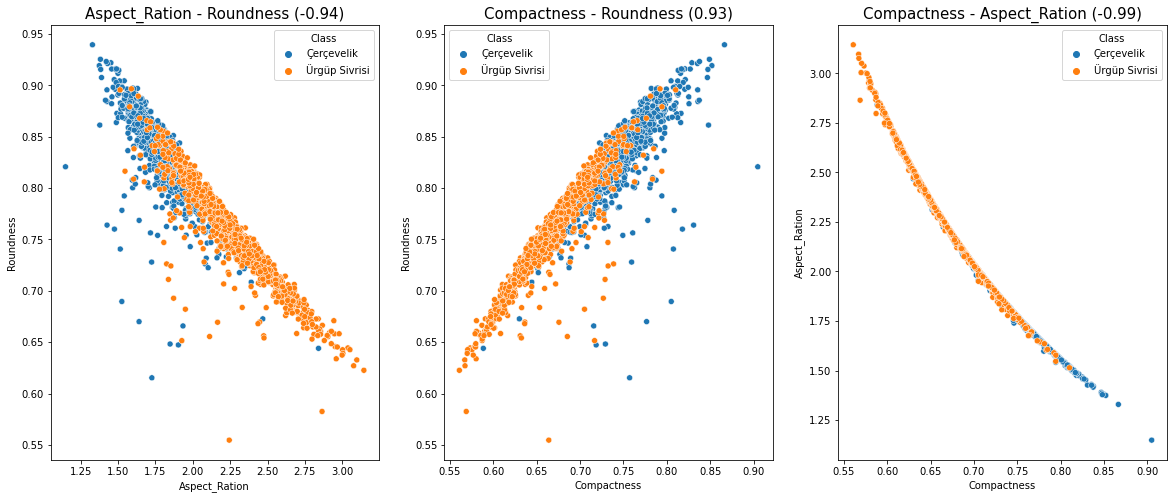

In [246]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='Aspect_Ration', y='Roundness', hue='Class')
plt.title("Aspect_Ration - Roundness (-0.94)", fontsize=15)

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='Compactness', y='Roundness', hue='Class')
plt.title("Compactness - Roundness (0.93)", fontsize=15)

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='Compactness', y='Aspect_Ration', hue='Class')
plt.title("Compactness - Aspect_Ration (-0.99)", fontsize=15)

plt.show()

# **Data Preprocessing**

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Other than **Class** all the **data points** are **numerical** and there are no **Null Values**. That's great, now we can focus on **Model Building**. Let's turn the **class to numbers**.

In [248]:
class_mapping = {}
reverse_class_mapping = {}
class_names = df['Class']
for i, name in enumerate(class_names.unique()):
    class_mapping[name] = i
    reverse_class_mapping[i] = name

In [249]:
df['Class'] = df['Class'].map(class_mapping)

In [250]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


# **Data Splitting**

In [251]:
# Splitted Data
y_full = df.pop('Class').to_numpy()
X_full = df.to_numpy()

# Scaled Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Data Spliting
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_full, test_size=0.2)

# **Models**

### Random Forest

In [252]:
# Model
rfc = RandomForestClassifier(max_depth=10, max_features=10, random_state=656)
rfc.fit(X_train, y_train)

# Prediction
pred = rfc.predict(X_valid)

# Metrics
report = classification_report(y_valid, pred)
cm = confusion_matrix(y_valid, pred)
rfc_f1 = f1_score(y_valid, pred)
rfc_Precision = precision_score(y_valid, pred)
rfc_Recall = recall_score(y_valid, pred)

# Show
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(rfc_f1*100))
print("Precision Score  : {:.4}%\n".format(rfc_Precision*100))
print("Recall Score     : {:.4}%".format(rfc_Recall*100))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       248
           1       0.88      0.86      0.87       252

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

Confusion Matrix : 
[[218  30]
 [ 35 217]]

F1 Score         : 86.97%

Precision Score  : 87.85%

Recall Score     : 86.11%


### Logistic Regression

In [253]:
# Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Prediction
pred = lr.predict(X_valid)

# Metrics
report = classification_report(y_valid, pred)

cm = confusion_matrix(y_valid, pred)
lr_f1 = f1_score(y_valid, pred)
lr_Precision = precision_score(y_valid, pred)
lr_Recall = recall_score(y_valid, pred)

# Show
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(lr_f1*100))
print("Precision Score  : {:.4}%\n".format(lr_Precision*100))
print("Recall Score     : {:.4}%".format(lr_Recall*100))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       248
           1       0.90      0.86      0.88       252

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

Confusion Matrix : 
[[223  25]
 [ 36 216]]

F1 Score         : 87.63%

Precision Score  : 89.63%

Recall Score     : 85.71%


# **Model Comparision**

In [254]:
names = ['RFC','LR']
f1_scores = [rfc_f1, lr_f1]
precision_scores = [rfc_Precision, lr_Precision]
recall_scores = [rfc_Recall, lr_Recall]

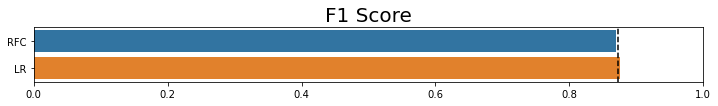

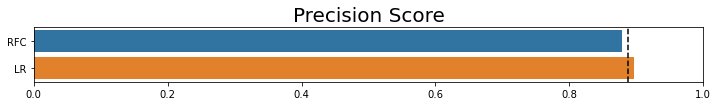

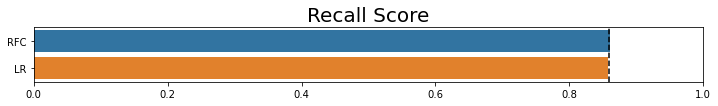

In [255]:
# Model Comaprision
plt.figure(figsize=(12,1))
plt.title("F1 Score", fontsize=20)
sns.barplot(y=names, x=f1_scores)
plt.axvline(np.mean(f1_scores), color='k', linestyle='--')
plt.xlim([0,1])
plt.show()

plt.figure(figsize=(12,1))
plt.title("Precision Score", fontsize=20)
sns.barplot(y=names, x=precision_scores)
plt.axvline(np.mean(precision_scores), color='k', linestyle='--')
plt.xlim([0,1])
plt.show()

plt.figure(figsize=(12,1))
plt.title("Recall Score", fontsize=20)
sns.barplot(y=names, x=recall_scores)
plt.axvline(np.mean(recall_scores), color='k', linestyle='--')
plt.xlim([0,1])
plt.show()

# **Conclusion**

These two models achieve **simillar peformance**. There are **not much differences**.